# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1) The first step is to load the data and then format the columns accordingly in order to make the data analysis easier

In [2]:
data = pd.read_csv('Data/2017_Toronto_Bikeshare_Clean.csv')

* Converting trip times columns to datetime objects and other columns as categorical types in order to reduce the file size

In [3]:
data['trip_start_time'] = pd.to_datetime(data['trip_start_time'])
data['trip_stop_time'] = pd.to_datetime(data['trip_stop_time'])
# convert dates from strings to datetimes
data['from_station_id'] = data['from_station_id'].astype('category')
data['from_station_name'] = data['from_station_name'].astype('category')
data['to_station_id'] = data['to_station_id'].astype('category')
data['to_station_name'] = data['to_station_name'].astype('category')
data['user_type'] = data['user_type'].astype('category')

* Check if conversion was successful by calling dtypes attribute

In [4]:
data.dtypes

trip_id                           int64
trip_start_time          datetime64[ns]
trip_stop_time           datetime64[ns]
trip_duration_seconds           float64
from_station_id                category
from_station_name              category
to_station_id                  category
to_station_name                category
user_type                      category
dtype: object

* Check memory usage of dataframe (bottom of output)

In [5]:
data.info(memory_usage='deep')
#memory usage of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492368 entries, 0 to 1492367
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trip_id                1492368 non-null  int64         
 1   trip_start_time        1492368 non-null  datetime64[ns]
 2   trip_stop_time         1492368 non-null  datetime64[ns]
 3   trip_duration_seconds  1492368 non-null  float64       
 4   from_station_id        1492368 non-null  category      
 5   from_station_name      1492368 non-null  category      
 6   to_station_id          1492368 non-null  category      
 7   to_station_name        1492368 non-null  category      
 8   user_type              1492368 non-null  category      
dtypes: category(5), datetime64[ns](2), float64(1), int64(1)
memory usage: 58.4 MB


# Data Analysis

2) The data analysis will be split into 3 parts:
  * Business inquiries (general bike usage)
  * Monetization (looking at revenue due to overage fees)
  * User profiles (generating random user ids and finding groupings for user types, like morning or summer users)

## Business Inquiries

### Add columns and functions
* First we add necessary columns (quarter, months,days etc.) and define functions for later use

Add columns for quarter (values from 0-3), month (0-11), monthday (0-28), weekday (0-6) and hour (0-23) based off the trip_start_time column using the according datetime attributes

In [6]:
data['quarter'] = [(x.month-1)//3 for x in data['trip_start_time']]
data['month'] = [x.month-1 for x in data['trip_start_time']]
data['monthday'] = [x.day-1 for x in data['trip_start_time']]
data['weekday'] = [x.weekday() for x in data['trip_start_time']]
data['hour'] = [x.hour for x in data['trip_start_time']]
# add columns for quarter, month, day of month and day of week (starting at 0)

Check if columns were added correctly

In [7]:
data.tail(2)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,quarter,month,monthday,weekday,hour
1492366,2383645,2017-12-31 23:49:08,2017-12-31 23:49:34,26.0,7020,Phoebe St / Spadina Ave,7020,Phoebe St / Spadina Ave,Member,3,11,30,6,23
1492367,2383646,2017-12-31 23:49:41,2017-12-31 23:57:41,480.0,7020,Phoebe St / Spadina Ave,7022,Simcoe St / Queen St W,Member,3,11,30,6,23


* The `most_counts_per()`-function groups the dataframe by specified columns and returns the top N counts of the 'trip_id'-column (any other column would suffice as well) for each subgroup
* Parameters are: list of groupable column names, and number of top counts per subgroup
* groupby object is returned

In [8]:
def most_counts_per(groupby_list,items_per_group=1):
    df = data.groupby(groupby_list)['trip_id'].count().groupby(level=0, group_keys=False).nlargest(items_per_group)
    return df 

* The `most_popular()`-function groups the dataframe by specified columns and returns the top N counts of the 'trip_id'-column (any other column would suffice as well)
* Parameters are: list of groupable column names, and number of top counts
* dataframe is returned

In [9]:
def most_popular(groupby_list,amount=1):
    df = data.groupby(groupby_list)['trip_id'].count().sort_values(ascending=False).head(amount).reset_index()
    df.rename(columns = {'trip_id':'counts'}, inplace = True)
    return df

* The `trip_length_per()`-function groups the dataframe by specified columns and returns the specified aggregation for each subgroup
* Parameters are: list of groupable column names, and the aggregation method
* groupby object is returned

In [10]:
def trip_length_per(groupby_list,agg_method='mean'):
    df = data.groupby(groupby_list)['trip_duration_seconds'].agg(agg_method).round()
    return df

### Most popular days of the week by month, quarter

**Results:**
  * Weekdays seem to be more popular across every month and quarter, with Wednesday being the most popular day in 5/12 months
  * The summer months (third quarter) are the most popular in general, due to the nice weather



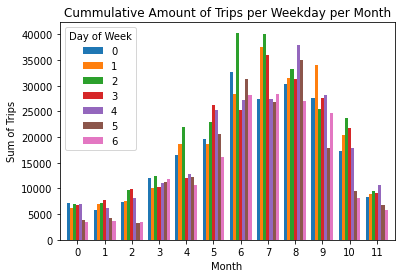

In [11]:
plt.rcParams['figure.facecolor'] = 'w'
ax = most_counts_per(['month','weekday'],7).unstack().plot(kind='bar',rot=0,width=0.8)
plt.xlabel('Month')
plt.ylabel('Sum of Trips')
plt.title('Cummulative Amount of Trips per Weekday per Month')
ax.legend(title='Day of Week')
plt.show()

#print(most_counts_per(['month','weekday'],7))

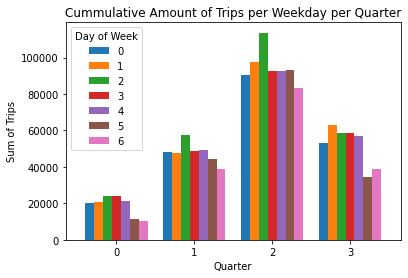

In [12]:
plt.rcParams['figure.facecolor'] = 'w'
ax = most_counts_per(['quarter','weekday'],7).unstack().plot(kind='bar',rot=0,width=0.8)
plt.xlabel('Quarter')
plt.ylabel('Sum of Trips')
plt.title('Cummulative Amount of Trips per Weekday per Quarter')
ax.legend(title='Day of Week')
plt.show()

#print(most_counts_per(['quarter','weekday'],7))

quarter
0    18875.0
1    47622.0
2    94784.0
3    51915.0
Name: trip_id, dtype: float64


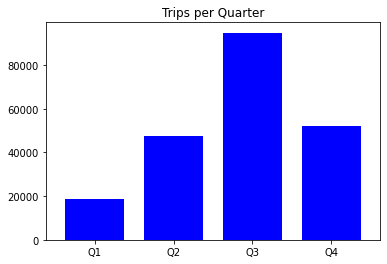

In [52]:
df = data.groupby(['quarter','weekday'])['trip_id'].count().groupby(level=0, group_keys=False).mean()
print(df.round(0))
df.plot(kind='bar',rot=0,width=0.75,color='b')

plt.xlabel('')
plt.ylabel('')
plt.title('Trips per Quarter')
plt.xticks(np.arange(4), ('Q1', 'Q2', 'Q3', 'Q4'))
plt.show()

weekday
0    212045
1    228686
2    253501
3    223933
4    219743
5    182982
6    171478
Name: trip_id, dtype: int64


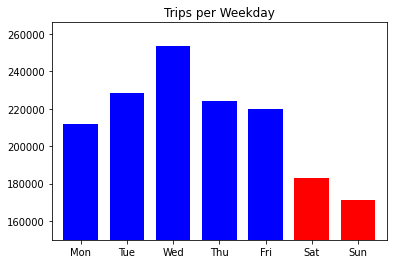

In [51]:
df = most_counts_per(['weekday'],1)
print(df.round(0))

df.plot(kind='bar',width=0.75,rot=0,
        color=tuple(['b','b','b','b','b','r','r']))

plt.xlabel('')
# plt.ylabel('Amount of Trips')
plt.title('Trips per Weekday')
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun'))
plt.ylim(150000)
plt.show()

### Average ride time per day of the week? Month?

**Results:**
  * Weekend trips are 20+ minutes on average, whereas trips during the week are below 17 minutes
  * During the summer months (July-September) trips are long (18+ minutes), where as during the other months they are shorter on average (below 17 minutes)


weekday
0    16.2
1    14.7
2    14.6
3    14.5
4    15.0
5    22.8
6    23.8
Name: trip_duration_seconds, dtype: float64


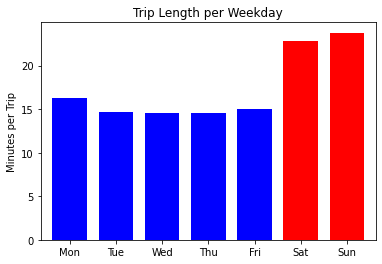

In [50]:
df = trip_length_per('weekday')/60
print(df.round(1))

df.plot(kind='bar',width=0.75,rot=0,
        color=tuple(['b','b','b','b','b','r','r']))

plt.xlabel('')
plt.ylabel('Minutes per Trip')
plt.title('Trip Length per Weekday')
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun'))
# plt.ylim(500,1500)
plt.show()

quarter
0    11.3
1    15.9
2    20.6
3    13.5
Name: trip_duration_seconds, dtype: float64


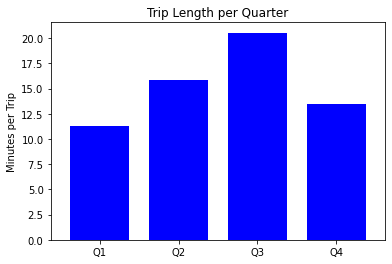

In [49]:
df = trip_length_per('quarter')/60
print(df.round(1))

df.plot(kind='bar',width=0.75,rot=0,color='b')

plt.xlabel('')
plt.ylabel('Minutes per Trip')
plt.title('Trip Length per Quarter')
plt.xticks(np.arange(4), ('Q1', 'Q2', 'Q3', 'Q4'))
# plt.ylim(500,1500)
plt.show()

### Average daily trips per month

**Results:**
  * The amount of trips per day during the summer months is higher (2-3 times) as during the other months

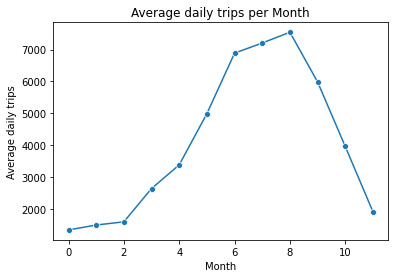

    month  counts
0       0  1333.0
1       1  1487.0
2       2  1587.0
3       3  2634.0
4       4  3378.0
5       5  4987.0
6       6  6890.0
7       7  7209.0
8       8  7547.0
9       9  5986.0
10     10  3957.0
11     11  1907.0


In [17]:
data_agg = data.groupby(['month','monthday'])['trip_id'].count().groupby(level=0, group_keys=False).mean().round().reset_index()
data_agg.rename(columns = {'trip_id':'counts'}, inplace = True)
data_agg

sns.lineplot(x=data_agg['month'],y=data_agg['counts'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average daily trips')
plt.title('Average daily trips per Month')
# Average daily trip length per Month in seconds
plt.show()

print(data_agg)

### Popular start and end stations

**Results:**
  * 'Union Station' and 'Simcoe St / Wellington St W' are the most popular as both departure and arrival station
  * The drive to 'Union Station' is the most popular event

In [42]:
df = most_popular('from_station_name',10)
df.columns = (['Station (Start)','Counts'])
df
# most poular end stations

,Station (Start),Counts
0,Union Station,22143
1,Simcoe St / Wellington St W,21365
2,York St / Queens Quay W,19143
3,Bay St / Wellesley St W,18082
4,King St W / Spadina Ave,18039
5,Bay St / College St (East Side),17381
6,Queen St W / Portland St,17295
7,Front St W / Blue Jays Way,16173
8,Simcoe St / Queen St W,15234
9,College Park South,15187


In [43]:
df = most_popular('to_station_name',10)
df.columns = (['Station (Finish)','Counts'])
df
# most poular end stations

,Station (Finish),Counts
0,Union Station,29228
1,Simcoe St / Wellington St W,22809
2,York St / Queens Quay W,20768
3,King St W / Spadina Ave,19521
4,Queen St W / Portland St,17872
5,Bay St / College St (East Side),17100
6,Phoebe St / Spadina Ave,16093
7,Front St W / Blue Jays Way,16075
8,Bay St / Queens Quay W (Ferry Terminal),16029
9,Bay St / Albert St,15780


### Total usage/mileage/time among user profile groups
**Results:**
  * Members use the bikes about 3 times as often as casual users in total
  * However the total trip times are almost the same (Members driving slighty longer in total), indicating much longer individual trip times for casual bikers
  * *Members most likely use their bikes for trips to work, casuals to explore the city*

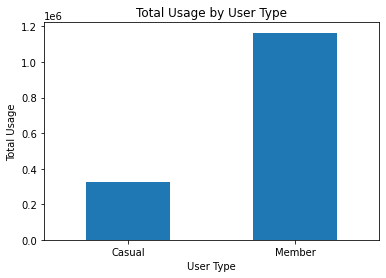

user_type
Casual     327584
Member    1164784
Name: trip_id, dtype: int64


In [47]:
most_counts_per('user_type').plot.bar(rot=0)
plt.xlabel('User Type')
plt.ylabel('Total Usage')
plt.title('Total Usage by User Type')
plt.show()

print(most_counts_per('user_type'))
#total amount of trips per user_type

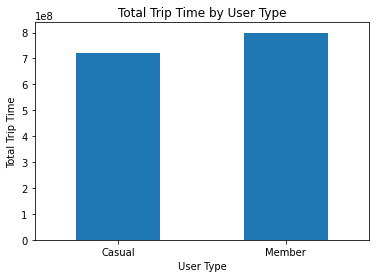

user_type
Casual    719238903.0
Member    799419561.0
Name: trip_duration_seconds, dtype: float64


In [48]:
trip_length_per('user_type','sum').plot.bar(rot=0)
plt.xlabel('User Type')
plt.ylabel('Total Trip Time')
plt.title('Total Trip Time by User Type')
plt.show()

print(trip_length_per('user_type','sum'))
#total trip time per user_type group in days

### Insights into the most popular routes
**Results:**
  * The three most popular routes all were round trips:
    * Ontario Place Blvd / Remembrance Dr
    * Bay St / Queens Quay W (Ferry Terminal)
    * York St / Queens Quay W

In [44]:
df = most_popular(['from_station_name','to_station_name'],10)

df.columns = ['Station (Start)','Station (Finish)','Counts']

df
# most popular routes

,Station (Start),Station (Finish),Counts
0,Ontario Place Blvd / Remembrance Dr,Ontario Place Blvd / Remembrance Dr,3802
1,Bay St / Queens Quay W (Ferry Terminal),Bay St / Queens Quay W (Ferry Terminal),3468
2,York St / Queens Quay W,York St / Queens Quay W,2333
3,Front St W / Blue Jays Way,Union Station,1956
4,HTO Park (Queens Quay W),HTO Park (Queens Quay W),1366
5,Queens Quay / Yonge St,Queens Quay / Yonge St,1239
6,Queens Quay W / Lower Simcoe St,Queens Quay W / Lower Simcoe St,1184
7,Dockside Dr / Queens Quay E (Sugar Beach),Dockside Dr / Queens Quay E (Sugar Beach),1174
8,Bremner Blvd / Rees St,Bremner Blvd / Rees St,1156
9,Queens Quay W / Dan Leckie Way,Queens Quay W / Dan Leckie Way,1149


## Monetization

### Add columns _/
  * Add columns for overage type (Type 1 - Type 5, as specified in briefing) and amount of money made through overage fees as per briefing

In [23]:
money_list = []
overage_list = []

for each in data['trip_duration_seconds']:
    if each/60/30 > 4:
        money_list.append(16)
        overage_list.append('Type 5')
    elif each/60/30 > 3:
        money_list.append(12)
        overage_list.append('Type 4')
    elif each/60/30 > 2:
        money_list.append(8)
        overage_list.append('Type 3')
    elif each/60/30 > 1:
        money_list.append(4)
        overage_list.append('Type 2')
    else:
        money_list.append(0)
        overage_list.append('Type 1')

data['money'] = money_list
data['overage'] = overage_list

data['overage'] = data['overage'].astype('category')

#Add columns for overage type and amount of money made through overage fees

### Total overage trips

**Results:**
  * Casuals seem to have more overage trips than members, however 93% of all trips are without overage
  * *Members seem to avoid overage fees, Casuals have more extensive trips (more type 5 casuals than total members with overage fees)*

In [24]:
most_counts_per(['overage']).reset_index()['trip_id'][0] / data.shape[0]

# Percentage of trips without overage fee

0.935695485295852

user_type  Casual   Member
overage                   
Type 1     246733  1149669
Type 2      42108    12882
Type 3      13366     1071
Type 4       8477      391
Type 5      16900      771


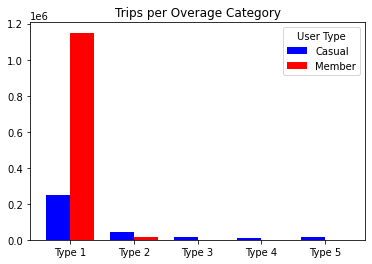

In [46]:
df = most_counts_per(['overage','user_type'],5).unstack()
print(df.round(0))
df.plot(kind='bar',rot=0,width=0.75,
        color = ['b','r'])


plt.xlabel('')
plt.ylabel('')
plt.title('Trips per Overage Category')
plt.legend(title='User Type')
plt.show()
# Amount of overage trips of different types, split for members and casual users

### Money made through overage
**Results:**
  * Casuals pay the most (89% of all overage fees), with most of them having type 5 overage
  * Members generally avoid overage fees, most of them being type 1

In [26]:
data.groupby(['user_type'])['money'].sum()[0] / data['money'].sum()
# Percentage of overage fees paid by casual users

0.8935645204027557

user_type  Casual  Member
overage                  
Type 1          0       0
Type 2     168432   51528
Type 3     106928    8568
Type 4     101724    4692
Type 5     270400   12336


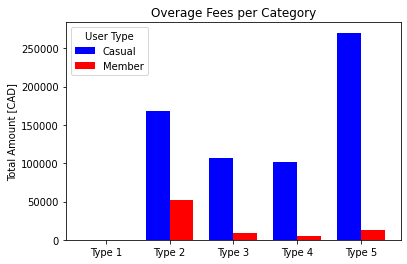

In [53]:
df = data.groupby(['overage','user_type'])['money'].sum().unstack()
print(df.round(0))
df.plot(kind='bar',rot=0,width=0.75,
        color = ['b','r'])

plt.xlabel('')
plt.ylabel('Total Amount [CAD]')
plt.title('Overage Fees per Category')
plt.legend(title='User Type')
plt.show()
# Total amount of all overage fees per user type and overage fee type, split for members and casual users

## User profiles
Observe and report on the effect of the user base over the year. Can you make projections for this into the next year?

The idea here is to assign every trip of a member a random user id. I chose to go with 6000 unique user ids, that gives each member an average of about 150 trips per year, so about one every two days. 

I chose a normal distribution for the random integers assigned to each member.

We can use these user ids in order to track bike usage on a user basis and see if there are different types of user groups.

In [28]:
user_id_list = []
np.random.seed(12)

for each in range(data.shape[0]):

  if data['user_type'][each] == 'Casual':
    user_id = 0
  else:
    user_id = 0
    while user_id < 1 or 6000 < user_id:
      user_id = int(np.random.normal(3000, 1200))
  
  user_id_list.append(user_id)

data['user_id'] = user_id_list

The trips per user vary between 6 and 457, which is less than 2 per day for the most frequent user

In [29]:
data['user_id'].value_counts()

0       327584
2969       457
3134       453
3050       452
2734       452
         ...  
24          11
5905         9
26           9
5944         9
3            6
Name: user_id, Length: 6001, dtype: int64

As mentioned above, the amount of trips are normally distributed among the user ids. The large peak at 0 comes from the trips of casual members as they were assigned a user id of 0.

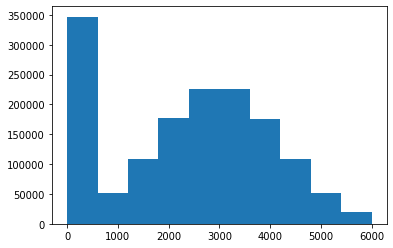

In [30]:
plt.hist(data['user_id'])
plt.show()

We see the amount of users goes up during the summer months, as do the number of trips. However they do not return to the same value at the end of the year as they were at the beginning. *This might indicate an increase in users over the years.*

* We could group the users into the two groups of summer and all year around users.

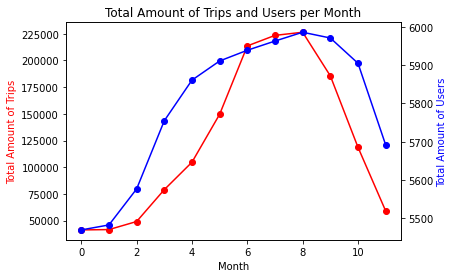

In [31]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
# make a plot
ax.plot(data.groupby(['month','trip_id'])['trip_id'].count().groupby(level=0).count(), marker='o',color="red")
# set x-axis label
ax.set_xlabel("Month")
# set y-axis label
ax.set_ylabel("Total Amount of Trips",color="red")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data.groupby(['month','user_id'])['user_id'].count().groupby(level=0).count(), marker='o',color="blue")
ax2.set_ylabel("Total Amount of Users",color="blue")

plt.title('Total Amount of Trips and Users per Month')

plt.show()

There is a low amount of trips and users during the early hours of the day. After 7am the amount of trips and users increases. The amount of trips peaks at 5pm, probably due to people taking the bikes home from work. We see a consistent amount of users throughout the day after 7am.

* We can group the users into night/morning users and day time users

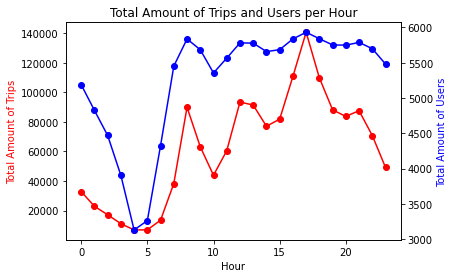

In [32]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
# make a plot
ax.plot(data.groupby(['hour','trip_id'])['trip_id'].count().groupby(level=0).count(), marker='o',color="red")
# set x-axis label
ax.set_xlabel("Hour")
# set y-axis label
ax.set_ylabel("Total Amount of Trips",color="red")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data.groupby(['hour','user_id'])['user_id'].count().groupby(level=0).count(), marker='o',color="blue")
ax2.set_ylabel("Total Amount of Users",color="blue")

plt.title('Total Amount of Trips and Users per Hour')

plt.show()

**Projections**
* The total amount of users and trips will increase next year, as it hasn't dropped to the level at the beginning of the year
* Trip numbers go up during the summer and down during the night

# SQL

* I split up the original bike share data into three separate tables, reducing the size of the original table, by eliminating the station ids and user types
* The ids are stored into two separate tables with the station names and user ids as primary keys

In [33]:
most_counts_per(['from_station_name','from_station_id']).reset_index()

,from_station_name,from_station_id,trip_id
0,111 Bond St (North of Dundas St E) - SMART,0,718
1,161 Bleecker St (South of Wellesley),7071,3015
2,25 York St (ACC/Union Station South),7070,7436
3,424 Wellington St W,0,2833
4,424 Wellington St. W,7123,3136
...,...,...,...
288,Yonge St / Harbour St,7067,7071
289,Yonge St / Wood St,7163,7564
290,Yonge St / Yorkville Ave,7126,6462
291,York St / King St W - SMART,0,2423


In [34]:
station_name = most_counts_per(['from_station_name','from_station_id']).reset_index()[['from_station_id','from_station_name']]
#SQL table of station ids, with name as the primary look up key
station_name.tail()

,from_station_id,from_station_name
288,7067,Yonge St / Harbour St
289,7163,Yonge St / Wood St
290,7126,Yonge St / Yorkville Ave
291,0,York St / King St W - SMART
292,7076,York St / Queens Quay W


In [35]:
user_type = most_counts_per(['user_id','user_type']).reset_index()[['user_id','user_type']]
#SQL table of user types for the corresponding user_id as the primary key
user_type.head()

,user_id,user_type
0,0,Casual
1,1,Member
2,2,Member
3,3,Member
4,4,Member


In [36]:
data_short = data.iloc[:,[0,1,2,5,7,16]]
data_short.head(2)
#SQL table of the main data, excluding station_ids and user_types

,trip_id,trip_start_time,trip_stop_time,from_station_name,to_station_name,user_id
0,712382,2017-01-01,2017-01-01 00:03:00,Wellesley St E / Yonge St Green P,Church St / Wood St,3567
1,712383,2017-01-01,2017-01-01 00:05:00,Kendal Ave / Bernard Ave,Bathurst Subway Station,2182


By merging the main table (data_short) with the user_type table via the user_id key, we acquire a new table with each record of the original data_short table but also the corresponding user_type

In [37]:
pd.merge(data_short,user_type, how='left',left_on='user_id',right_on='user_id').head()
#Joined SQL tables on the matching Key user_id

,trip_id,trip_start_time,trip_stop_time,from_station_name,to_station_name,user_id,user_type
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,Wellesley St E / Yonge St Green P,Church St / Wood St,3567,Member
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,Kendal Ave / Bernard Ave,Bathurst Subway Station,2182,Member
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,Parliament St / Aberdeen Ave,College St W / Markham St,3290,Member
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,College Park South,King St W / Spadina Ave,959,Member
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,McGill St / Church St,University Ave / Gerrard St W,3903,Member


# Interesting Findings
* There are 16 records where bikes have been rented for over a week
* There are 782 records where bikes have been rented for less than 3 seconds
* Weekdays are more popular for users than the weekend, probably due to commuters
* 5% of trips were round trips

In [38]:
data[data['trip_duration_seconds'] > 60*60*24*7].shape[0]
#There are 16 records where bikes have been rented for over a week

16

In [39]:
data[data['trip_duration_seconds'] < 3].shape[0]
#There are 782 records where bikes have been rented for less than 3 seconds

782

In [40]:
data.groupby('weekday')['trip_id'].count()
#Weekdays are more popular for users than the weekend, probably due to commuters

weekday
0    212045
1    228686
2    253501
3    223933
4    219743
5    182982
6    171478
Name: trip_id, dtype: int64

In [41]:
data[data['from_station_name'] == data['to_station_name']].shape[0] / data.shape[0]
# 5% of trips were round trips

0.04805919183472173